# Clustering

### Introduction

In previous lessons, we generally worked with our features one at a time.  That is we worked to determine how a single feature could impact a target variable.  Now, with most features, such as seeing how the number of beds affects the price, this makes sense.  However, as we know, other features make more sense in context with others.  

One way that these features may make sense with others, is simply to ask how "close" are one observations two features to another observations two features.  For example, with geographic data, we may ask, how close are the latitude and longitude features for one observation to those features for a separate observation.  For problems like these, clustering is a good solution.

Let's see clustering by way of example, and along the way, we can begin to understand how it works.

### Loading our data

Let's load our Airbnb data.   

In [5]:
import pandas as pd
df_train = pd.read_feather('./bnb_train.feather')
df_X_train = df_train.drop(columns = ['price'])
y_train = df_train.price

df_val = pd.read_feather('./bnb_val.feather')
df_X_val = df_train.drop(columns = ['price'])
y_val = df_train.price

In [6]:
df_X_val.shape

(11050, 304)

As we can see, this dataset has a quite a few features.

### Training our Model

Now to train our model, we only need to select the features that we will be clustering by.

In [7]:
X_geo = df_X_train.loc[:, ['longitude', 'latitude']]

Here, it is our longitude and latitude features.

In [8]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=9, init='random')
kmean.fit(X_geo)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
cluster_labels = kmean.labels_ 
cluster_labels

array([3, 4, 4, ..., 3, 2, 1], dtype=int32)

In [12]:
kmean.cluster_centers_

array([[13.43186868, 52.48489239],
       [13.37135399, 52.48912575],
       [13.45910814, 52.51648727],
       [13.41176757, 52.54029867],
       [13.5052048 , 52.48951264],
       [13.35296108, 52.54461626],
       [13.30900713, 52.49251953],
       [13.60747744, 52.45613038],
       [13.1987617 , 52.51030432]])

In [15]:
df_X_train.shape

(11050, 304)

Now we have a label for each one of our observations.  And that label corresponds to the cluster that the observation was assigned.

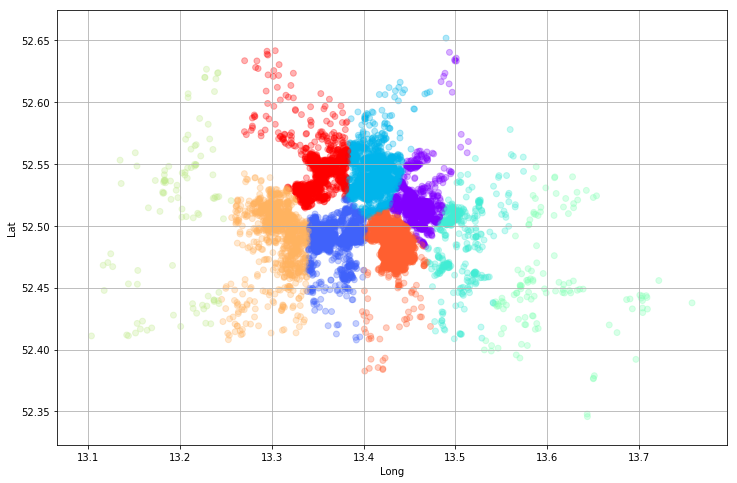

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(X_geo.iloc[:, 0], X_geo.iloc[:, 1], c=cluster_labels,  cmap=plt.cm.rainbow, s=35, linewidths=1, alpha=.3)
plt.xlabel('Long'), plt.ylabel('Lat')
plt.grid()

After training our model, if we would like to predict the clusters of future datapoints we can do so with the following:

In [4]:
X_val_geo = df_X_val.loc[:, ['longitude', 'latitude']]
val_labels = kmean.predict(X_val_geo)
val_labels[:7]

NameError: name 'kmean' is not defined

So here we can see the predictions of our validation set.

### Using this Our Model

Now at this point, if we think these labels may be useful.  We can simply add the cluster labels as a feature variable, and fit our random forest with it.

In [28]:
df_X_train.loc[:, 'geo_cluster'] = cluster_labels
df_X_val.loc[:, 'geo_cluster'] = val_labels

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(df_X_train, y_train)
rfr.score(df_X_val, y_val)

0.9281655114982154

And then we continue on with our feature selection techniques to see if adding the feature is actually helpful.